In [38]:
# 데이터 가져오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
train_df = pd.read_csv(r"C:\Users\helco\OneDrive\바탕 화면\h-dat\train.csv")
test_df = pd.read_csv(r"C:\Users\helco\OneDrive\바탕 화면\h-dat\test.csv")

In [40]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# EDA

In [41]:
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [42]:
test_df.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## Embarked

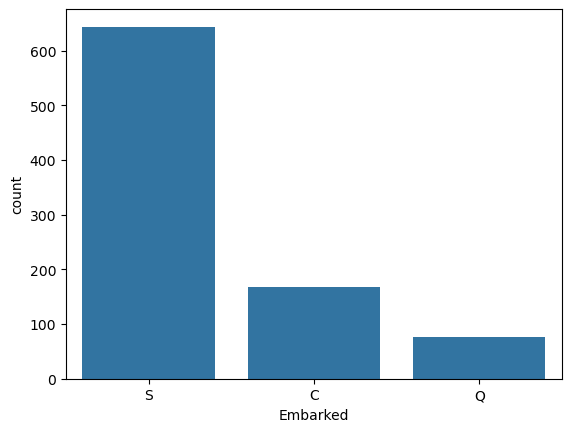

In [43]:
plt.figure()
sns.countplot(data = train_df, x = 'Embarked')
plt.show()

In [44]:
train_df[ train_df['Embarked'].isna()] 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


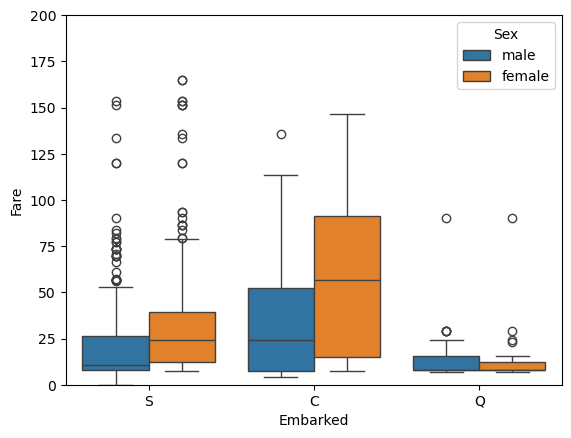

In [45]:
plt.figure()
sns.boxplot(data = train_df, x = 'Embarked' , y='Fare' , hue = 'Sex')
plt.ylim([ 0 , 200] ) # y축에 범위를 설정
plt.show()

In [46]:
train_df.loc[ train_df['Embarked'].isna() , 'Embarked'] = 'C'

In [47]:
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

## Age

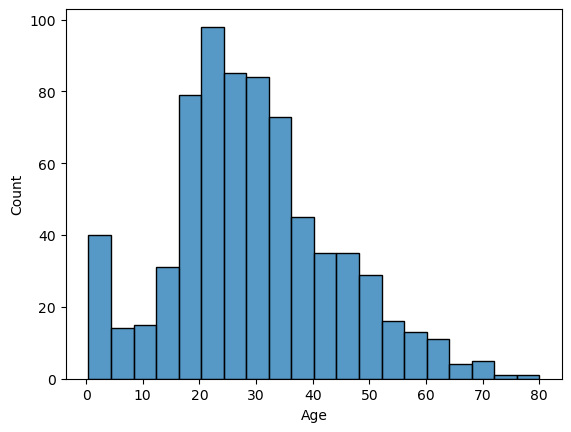

In [48]:
plt.figure()
sns.histplot(data = train_df, x = 'Age')
plt.show()

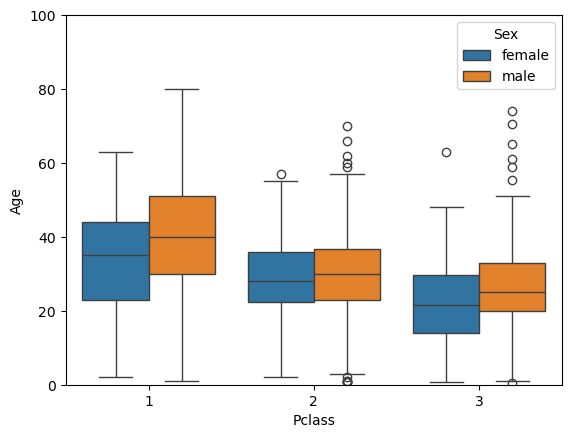

In [49]:
plt.figure()
sns.boxplot(data = train_df, x = 'Pclass' , y='Age' , hue = 'Sex')
plt.ylim([ 0 , 100] ) # y축에 범위를 설정
plt.show()

In [50]:
print(train_df['Age'].isna().sum())
temp = train_df.groupby(['Pclass','Sex'])['Age'].mean()

for ix in temp.index:
    cond1 = train_df['Age'].isna()
    cond2 = train_df['Pclass'] == ix[0]
    cond3 = train_df['Sex'] == ix[1]
    train_df.loc[cond1&cond2&cond3, 'Age'] = temp[ix]
    
    cond1 = test_df['Age'].isna()
    cond2 = test_df['Pclass'] == ix[0]
    cond3 = test_df['Sex'] == ix[1]
    test_df.loc[cond1&cond2&cond3, 'Age'] = temp[ix]

print(train_df.isna().sum())
print('----------------------------')
print(test_df.isna().sum())



177
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64
----------------------------
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


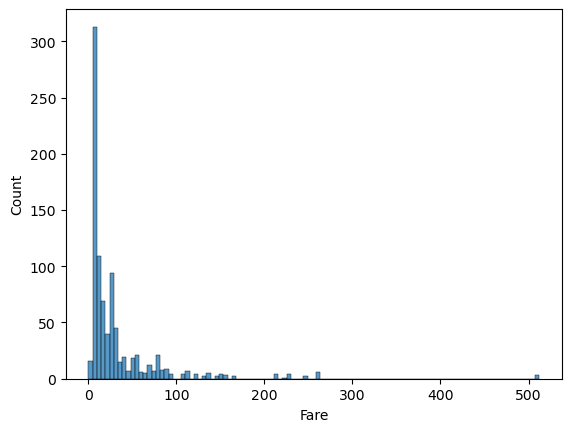

In [53]:
plt.figure()

sns.histplot(data = train_df, x = 'Fare')

plt.show()

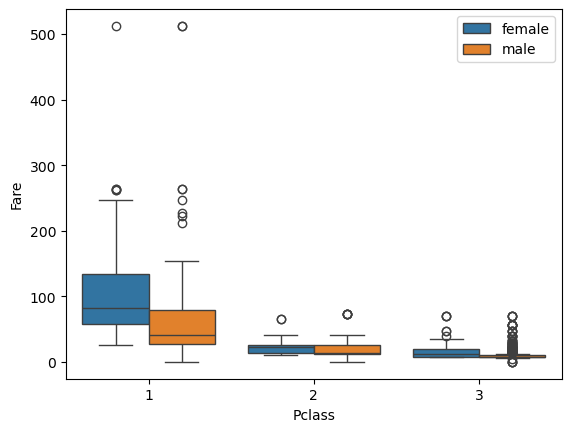

In [54]:
plt.figure()

sns.boxplot(data = train_df, x = 'Pclass', y = 'Fare' , hue = 'Sex')
plt.legend()

plt.show()

In [55]:
train_df.groupby(['Pclass','Sex'])['Fare'].median()
print(train_df.groupby(['Pclass','Sex'])['Fare'].median())

Pclass  Sex   
1       female    82.66455
        male      41.26250
2       female    22.00000
        male      13.00000
3       female    12.47500
        male       7.92500
Name: Fare, dtype: float64


In [56]:
test_df[test_df['Fare'].isna()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [57]:
test_df.loc[test_df['Fare'].isna(),'Fare'] = 7.925

## Feature 가공
 + 특성값들을 컴퓨터가 이해하기 쉽게 가공
 + 데이터가 아닌것들에서 데이터를 추출
     + 'Name', 'SibSp', 'Parch' 'Ticket'
 + 숫자 데이터 -> 스케일링
     + 'Age', 'Fare' 
 + 카테고리 -> 인코딩
     + 'Pclass', 'Sex', 'Embarked' 

In [60]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [61]:
train_df['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [65]:
def get_name(x):
    return x.split(',')[1].split('.')[0]

train_df['Name2'] = train_df['Name'].apply(get_name)
test_df['Name2'] = train_df['Name'].apply(get_name)

In [66]:
train_df['Family'] = train_df['SibSp'] + train_df['Parch'] 
test_df['Family'] = train_df['SibSp'] + train_df['Parch']

In [67]:
train_df['Family'].unique()

array([ 1,  0,  4,  2,  6,  5,  3,  7, 10], dtype=int64)

In [68]:
def family_category(x):
    if x <= 3:
        return 'small'
    elif x <= 5:
        return 'middle'
    else:
        return 'large'

train_df['Family_c'] = train_df['Family'].apply(family_category)
test_df['Family_c'] = test_df['Family'].apply(family_category)

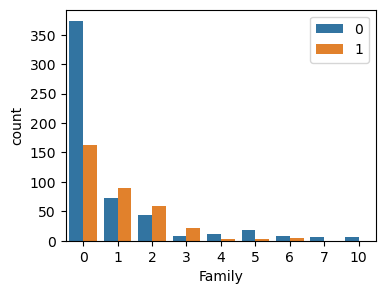

In [72]:
plt.figure(figsize = (4,3))

sns.countplot(data = train_df, x = 'Family' , hue = 'Survived')
plt.legend()
plt.show()

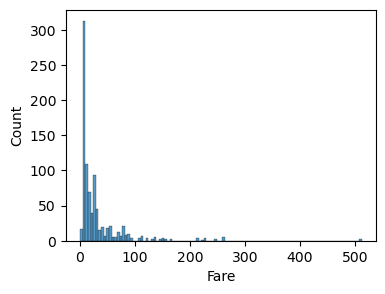

In [76]:
plt.figure(figsize = (4,3))

sns.histplot(data = train_df, x = 'Fare' )
plt.show()

In [77]:
train_df['Fare_log'] = np.log1p(train_df['Fare'])
test_df['Fare_log'] = np.log1p(test_df['Fare'])

 ## 스케일링

In [78]:
from sklearn.preprocessing import StandardScaler
# 1. 스케일러를 생성
sc = StandardScaler()

# 2. fit
sc.fit(train_df[ ['Age','Fare_log']] ) 

# 3. 실제 변환(transform) 
sc.transform( train_df[ ['Age','Fare_log'] ] ) # 앞에는 age를 스케일, 뒤에는 fare_log를 스케일
sc.transform( test_df[ [ 'Age', 'Fare_log'] ] ) # 일관성 유지

X = pd.DataFrame( sc.transform( train_df[ ['Age','Fare_log']]), 
             columns = ['Age', 'Fare'])

test_X = pd.DataFrame( sc.transform( test_df[ ['Age','Fare_log']]), 
             columns = ['Age', 'Fare'])

## 인코딩

In [80]:
from sklearn.preprocessing import OneHotEncoder

# 1. 모델 생성
one_hot = OneHotEncoder(drop= 'first', sparse_output = False) # drop='first' : 첫 번째 범주는 제거(drop), sparse_output = False : 결과를 numpy로 변환
# 2. fit
one_hot.fit( train_df[ ['Family_c','Pclass','Sex','Embarked']])
# 3. transform
X[one_hot.get_feature_names_out()]  = one_hot.transform(train_df[ ['Family_c','Pclass','Sex','Embarked']])
test_X[one_hot.get_feature_names_out()]  = one_hot.transform(test_df[ ['Family_c','Pclass','Sex','Embarked']])

# 랜덤 포레스트

In [88]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [89]:
y = train_df['Survived']

train_x, valid_x, train_y, valid_y = train_test_split(X, y , 
                                                      test_size = 0.3, 
                                                      random_state=16, 
                                                      stratify = y) 

In [90]:
params = {'max_depth' : [3,10,15], 'min_samples_leaf':[1,10,20,30]}

grid_rf = GridSearchCV(RandomForestClassifier(random_state=16), params, cv=5)
grid_rf.fit(train_x,train_y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=16),
             param_grid={'max_depth': [3, 10, 15],
                         'min_samples_leaf': [1, 10, 20, 30]})

In [91]:
cv_result = pd.DataFrame( grid_rf.cv_results_['params'])
cv_result['score'] = grid_rf.cv_results_['mean_test_score']
# cv_result
pd.pivot_table( cv_result, columns='max_depth', index='min_samples_leaf')

score                    
max_depth               3         10        15
min_samples_leaf                              
1                 0.820142  0.813755  0.807316
10                0.813742  0.810555  0.812155
20                0.808903  0.807303  0.807303
30                0.792903  0.792903  0.792903

In [92]:
rf_result = test_df[["PassengerId"]].copy()
rf_result['Survived'] = grid_rf.predict(test_X)
rf_result.to_csv(r'C:\Users\helco\OneDrive\바탕 화면\h-dat\타이타닉\result.csv', index=False)